In [1]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [2]:
wd <- file.path(analysis_dir, "validation", "03_WGBS", "03.6_WGBS_test_in_RRBS")

setwd(wd)

In [3]:
summary_files = list.files(pattern = "auc_test", recursive = TRUE)

In [4]:
length(summary_files)

[1] 8

In [5]:
summary_auc_list <- sapply(summary_files, fread, simplify = F)

In [17]:
summary_auc <- rbindlist(summary_auc_list)

In [18]:
head(summary_auc)

type,auc,ifRand,AUC_train,species_train
<chr>,<dbl>,<chr>,<dbl>,<chr>
SSS,0.543765,noRandTest,0.7790846,Bos_taurus
CSS,0.524803,noRandTest,0.7790846,Bos_taurus
SEP,0.534660,noRandTest,0.7790846,Bos_taurus
STT,0.552911,noRandTest,0.7790846,Bos_taurus
GST,0.498776,noRandTest,0.7790846,Bos_taurus
SGS,0.587579,noRandTest,0.7790846,Bos_taurus


In [19]:
NROW(summary_auc)

[1] 4624

In [21]:
summary_auc <- summary_auc[type %in% sp_df$species]

In [22]:
summary_auc[species_train == "Danio_rerio_GSE134055",species_train:="Danio_rerio",]

In [23]:
summary_auc$species_train <- gsub("_", " ", summary_auc$species_train)

In [24]:
summary_auc <- left_join(summary_auc, sp_df, by=c("type" = "species"))

In [25]:
summary_auc_mean <- summary_auc %>% group_by(species_train, group) %>% summarize(mean_auc = mean(auc), sd_auc = sd(auc))

`summarise()` has grouped output by 'species_train'. You can override using the `.groups` argument.



In [26]:
WGBS_species_order <- c('Branchiostoma lanceolatum','Danio rerio','Xenopus laevis', 'Chelydra serpentina','Gallus gallus', 'Phascolarctos cinereus', 'Mus musculus','Bos taurus')

In [27]:
head(summary_auc_mean)

species_train,group,mean_auc,sd_auc
<chr>,<fct>,<dbl>,<dbl>
Bos taurus,Inv.,0.5497271,0.02832202
Bos taurus,Ch.,0.5415236,0.02167343
Bos taurus,Act.,0.5567383,0.02840654
Bos taurus,Amp.,0.5380860,0.05145055
Bos taurus,Rep.,0.6319554,0.04478878
Bos taurus,Av.,0.6708464,0.04414494


In [28]:
summary_auc_mean$species_train <- factor(summary_auc_mean$species_train, levels = WGBS_species_order)

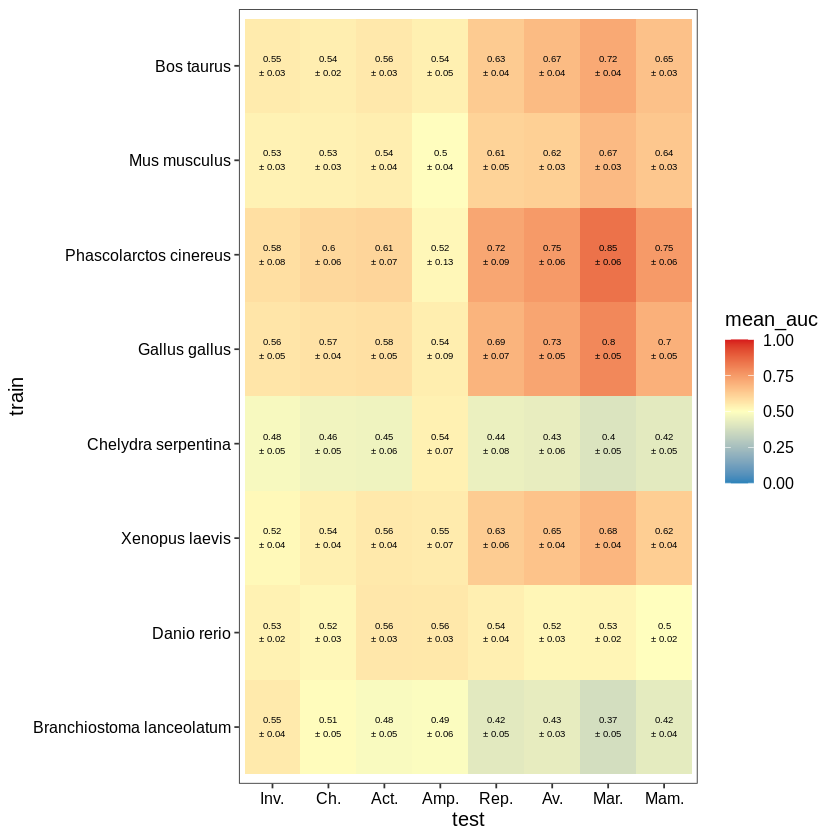

In [29]:
p <- ggplot(summary_auc_mean, aes(x = group, y = species_train, fill = mean_auc)) + 
geom_tile() +  
scale_fill_gradient2(limits = c(0,1), low = "#2b83ba",mid ="#ffffbf",  high ="#d7191c", midpoint = 0.5 ) + 
geom_text(aes(label = paste0(round(mean_auc,2), "\n± ", round(sd_auc,2))), size = 2) + xlab("test") + ylab("train")
p

In [30]:
ggsave("RRBS_WGBS_summary_heatmap.pdf", p, width = 6, height = 4)

In [31]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/validation/03_WGBS/03.6_WGBS_test_in_RRBS"